# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Yields
### Data analysis
#### Fit parameters vs nVeloTracks

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys
import scipy as sci
import mplhep
import uncertainties as un
import pandas as pd
from particle import Particle
import matplotlib.pyplot as plt
import os
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()
mplhep.styles.use(mplhep.styles.LHCb2)

%jsroot on

Welcome to JupyROOT 6.28/04
2024-06-20 12:26:01.497023
-------------------------
Set LHCb Style - May 2021
-------------------------


## Analysis default configuration

In [2]:
# Default configuration
ninters = 5
Run2 = True
Ds1_model = "CB"
prompt_check = False
TIS = True

if TIS:
    L0_trig = "TIS"
else:    
    L0_trig = "TISTOS"
    
if prompt_check:
    IP_cut = "tightIP"
else:
    IP_cut = "orIP"

In [3]:
Dsst_vals_file_def = "./Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Dsst_uncs_file_def = "./Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

Ds1_vals_file_def = "./Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Ds1_uncs_file_def = "./Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

In [4]:
df_Dsst_vals_def = pd.read_csv(Dsst_vals_file_def) 
df_Dsst_uncs_def = pd.read_csv(Dsst_uncs_file_def) 

df_Ds1_vals_def = pd.read_csv(Ds1_vals_file_def)
df_Ds1_uncs_def = pd.read_csv(Ds1_uncs_file_def)

In [5]:
print(df_Dsst_vals_def)

          NDsst    Ncomb_Dsst   nVelo_uup  nVelo_udown  nVelo_mean     aDsst  \
0  54043.998367  78087.240231   12.400626    38.599374   47.599374  1.210393   
1  52707.195126  79911.155054    7.995075     9.004925   70.004925  1.234734   
2  50960.671149  81335.693755    7.916178     8.083822   87.083822  1.254798   
3  47967.949690  79329.575990    9.899426     9.100574  105.100574  1.266919   
4  48260.714643  89810.024787  108.936648    23.063352  139.063352  1.288316   

   alphaR_Dsst     bDsst     cDsst      mu_Dsst  sigma_Dsst  
0    -0.797320  0.201347 -0.052833  2113.935487    6.857587  
1    -0.744739  0.242224 -0.035285  2114.090363    6.890364  
2    -0.739932  0.266801 -0.031036  2114.444527    7.002982  
3    -0.692839  0.275858 -0.027162  2114.346903    6.956541  
4    -0.688430  0.301554 -0.012263  2114.623506    7.049531  


### Yields vs $\mathrm{N_{Tracks}^{VELO}}$

In [6]:
def unc_ratio(a, b, ua, ub):
    ratio = a/b
    uratio = ratio * np.sqrt((ua/a)**2+(ub/b)**2)
    return uratio
    
yratio_def  = df_Ds1_vals_def["NDs1"] / df_Dsst_vals_def["NDsst"] 

uyratio_def = unc_ratio(df_Ds1_vals_def["NDs1"], df_Dsst_vals_def["NDsst"], 
                        df_Ds1_uncs_def["NDs1"], df_Dsst_uncs_def["NDsst"]) 

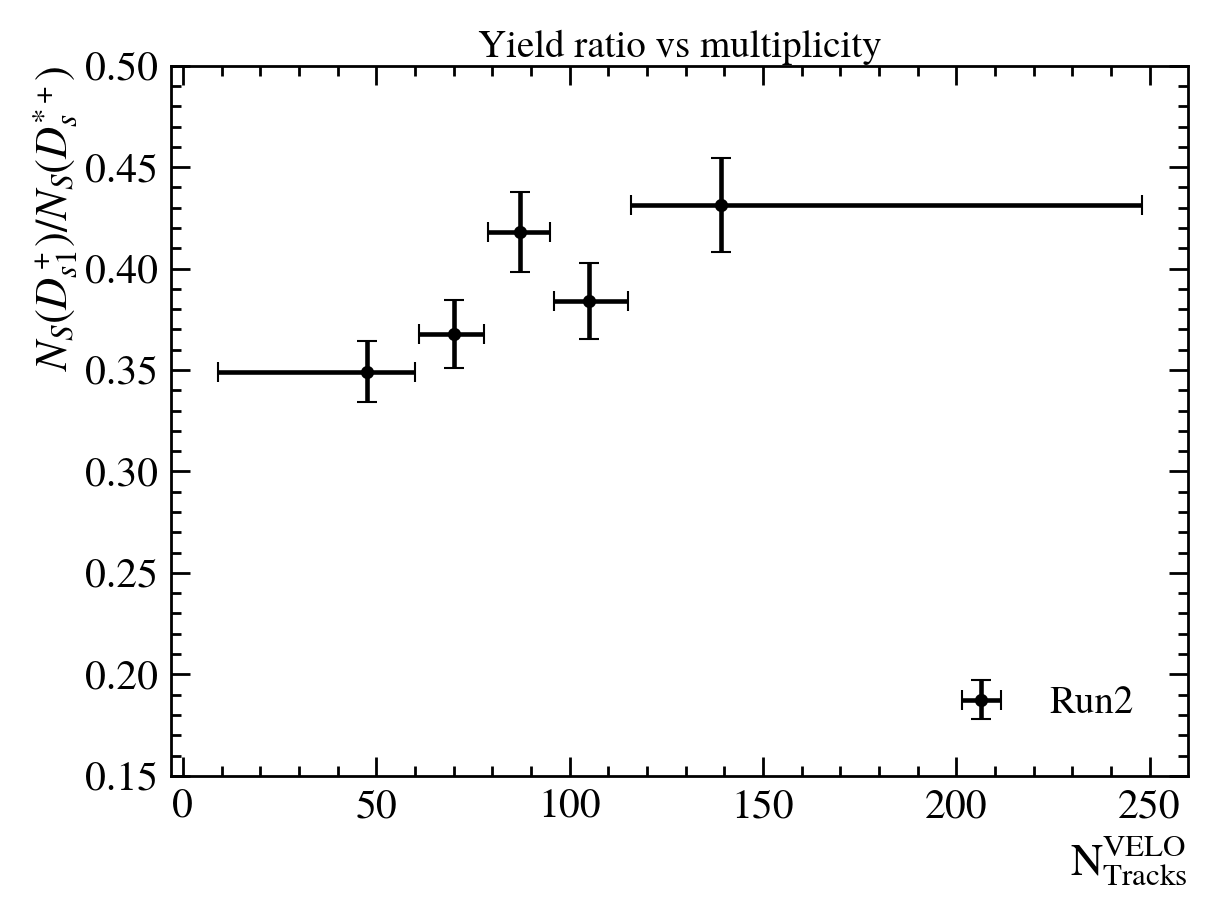

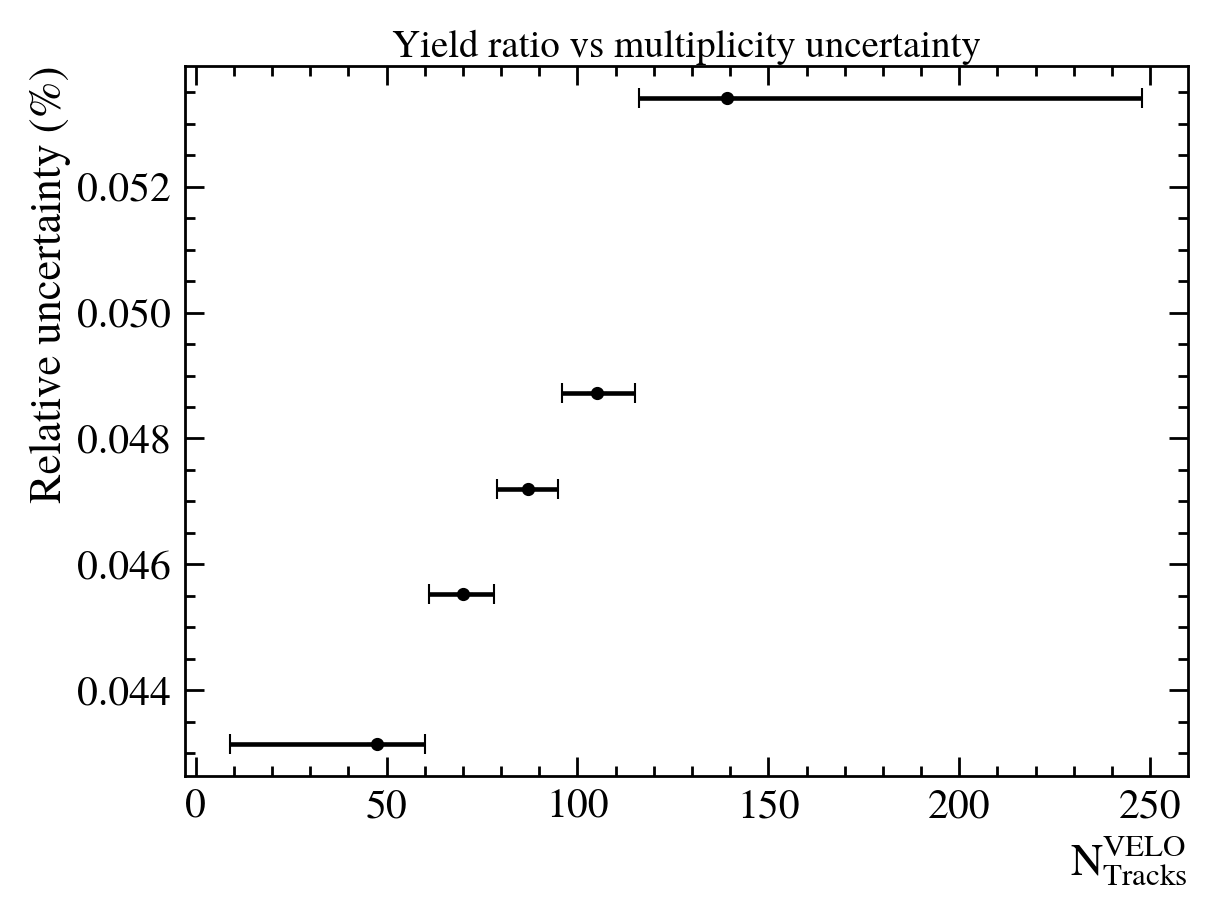

In [7]:
plt.figure(1)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], yratio_def, uyratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$")
plt.title("Yield ratio vs multiplicity")
plt.ylim(0.15, 0.5)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_default.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], uyratio_def/yratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Yield ratio vs multiplicity uncertainty")
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_ru_default.pdf", dpi=300, bbox_inches='tight')

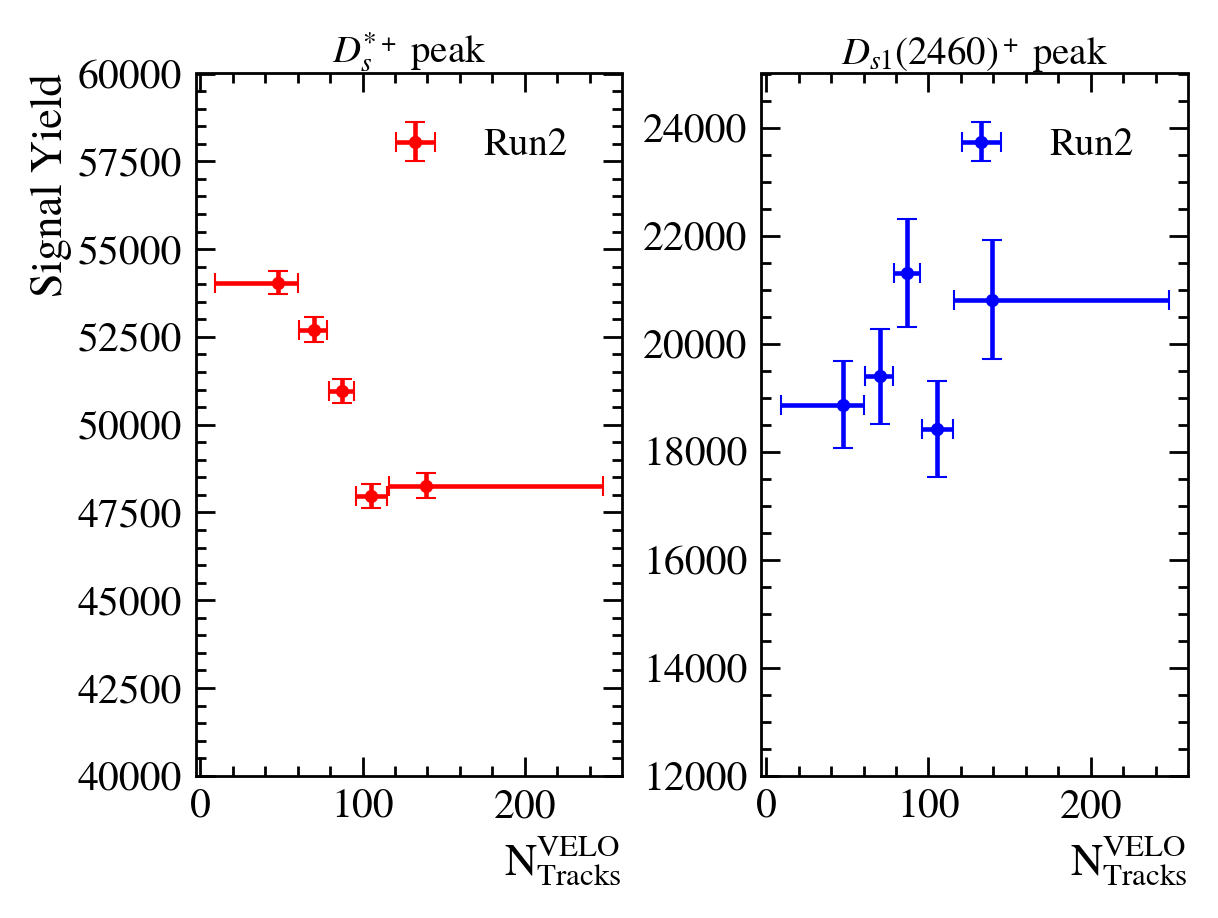

In [8]:
plt.figure(1)

plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["NDsst"], df_Dsst_uncs_def["NDsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield")
plt.legend()
plt.ylim(40000, 60000)

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["NDs1"], df_Ds1_uncs_def["NDs1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.ylim(12000, 25000)
plt.savefig("Graphs/Exp_Run2_DsgL_mass_yields_default.pdf", dpi=300, bbox_inches='tight')

### $\sigma_{D_{s1}^+}/\sigma_{D_s^{*+}}$ vs $\mathrm{N_{Tracks}^{VELO}}$

In [9]:
effs_path = "./Results"
effs_file = "MC_DsgL_eff_tot_ratio_vals_{0}_{1}_{2}.txt".format(Ds1_model, L0_trig, IP_cut)
ueffs_file = "MC_DsgL_eff_tot_ratio_uncs_{0}_{1}_{2}.txt".format(Ds1_model, L0_trig, IP_cut)

ratio_eff_tot_def = np.loadtxt("{0}/{1}".format(effs_path, effs_file))
uratio_eff_tot_def = np.loadtxt("{0}/{1}".format(effs_path, ueffs_file))

#ratio_eff_tot_def = np.array([0.06004091, 0.05861205, 0.05280075, 0.06140708, 0.06895982])
#uratio_eff_tot_def = np.array([0.00284067, 0.00300857, 0.00302511, 0.00360465, 0.00474821])

cr_sec_ratio_def = yratio_def * ratio_eff_tot_def
ucr_sec_ratio_def = cr_sec_ratio_def * np.sqrt((uyratio_def/yratio_def)**2 + (uratio_eff_tot_def/ratio_eff_tot_def)**2)

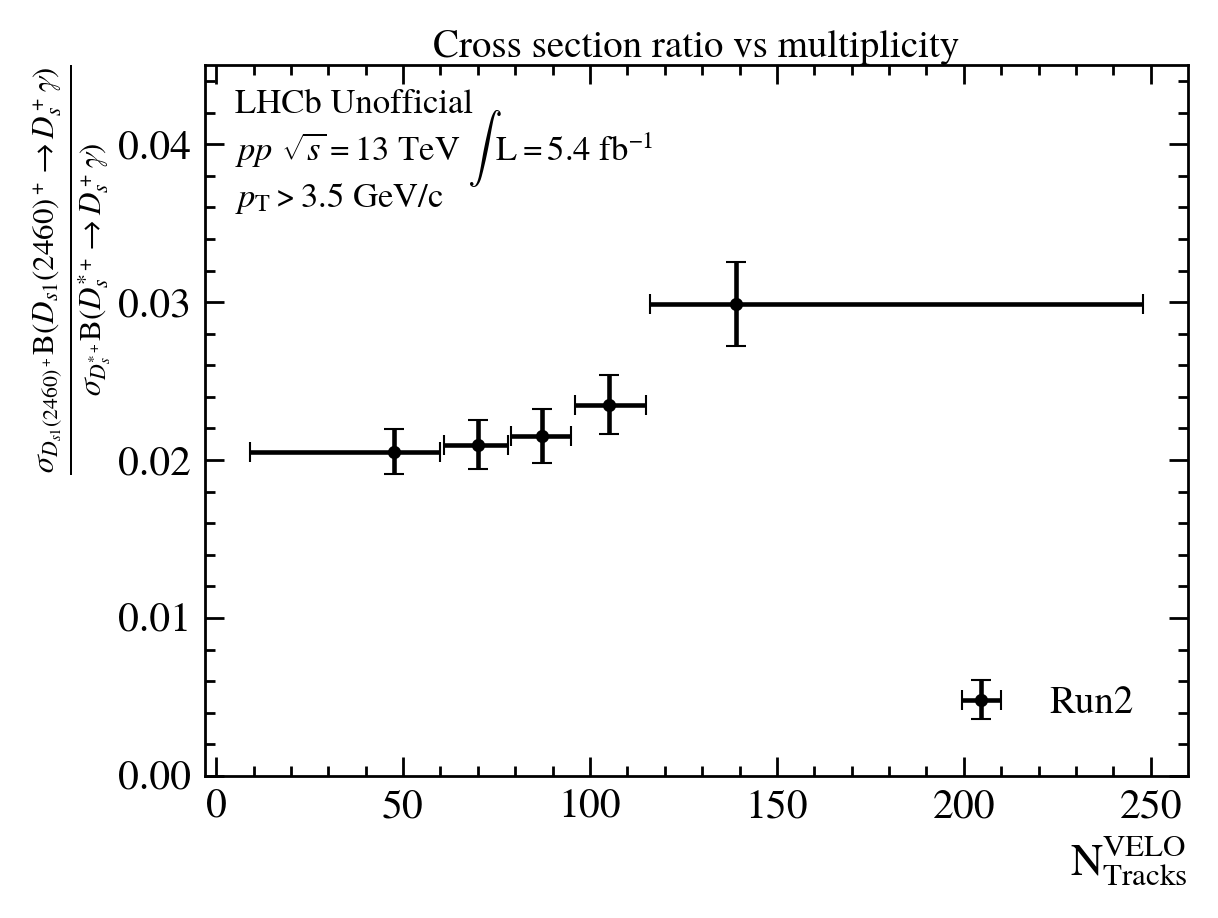

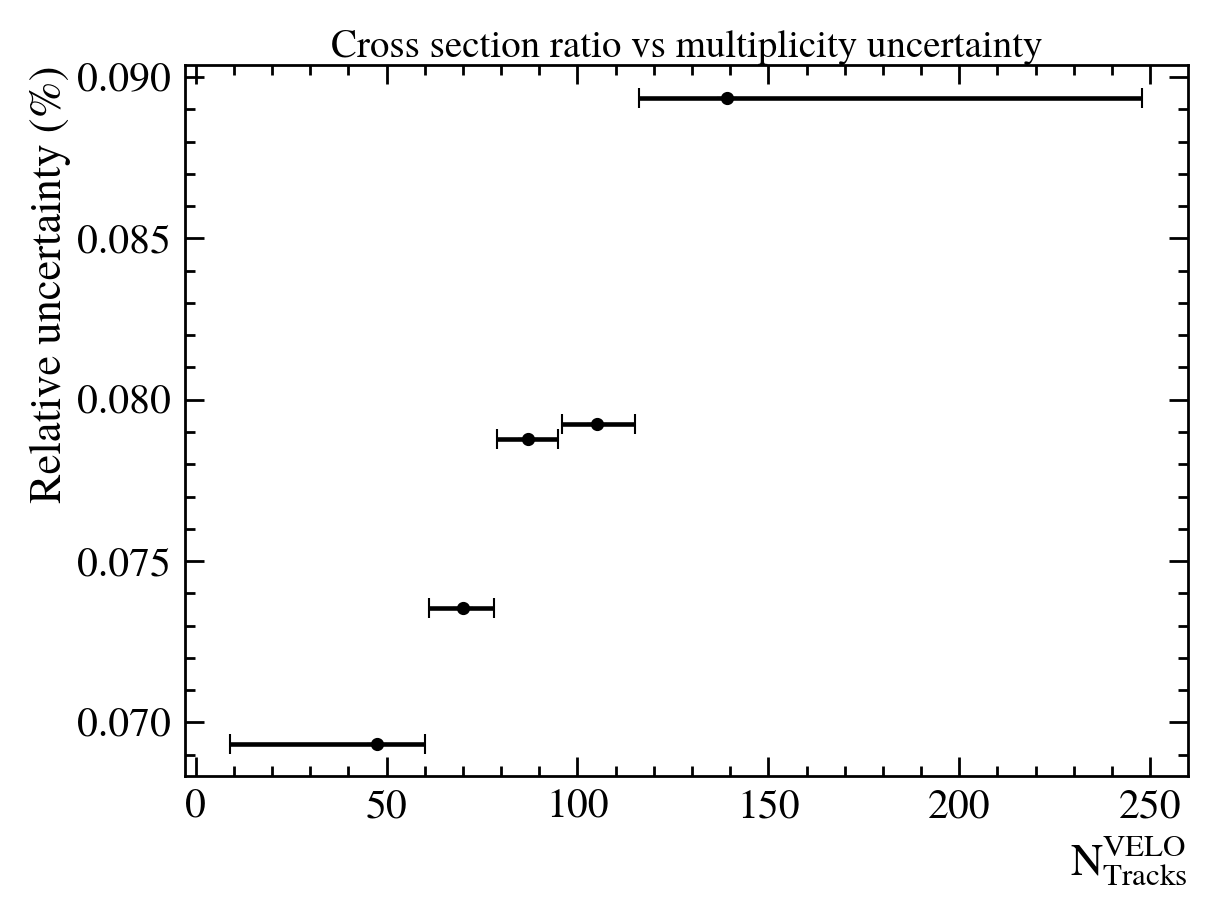

In [10]:
colors = ["black", "red", "blue"]

if not Run2: 
    print("Cell designed for Run2 data")
        
plt.figure(1)
plt.text(5, 0.042, r"LHCb Unofficial", fontsize=25)
plt.text(5, 0.039, r"$pp$ $\sqrt{s}=13$ $\mathrm{TeV} \text{ } \int \text{ } \mathcal{L} = 5.4 \text{ } \mathrm{fb^{-1}}$", fontsize=25)
plt.text(5, 0.036, r"$p_{\mathrm{T}} > 3.5 \text{ } \mathrm{GeV/c}$", fontsize=25)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], cr_sec_ratio_def, ucr_sec_ratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\frac{\sigma_{D_{s1}(2460)^+}\mathcal{B}(D_{s1}(2460)^+ \to D_s^+ \gamma)}{\sigma_{D_s^{*+}}\mathcal{B}(D_s^{*+} \to D_s^+ \gamma)}$")
plt.title("Cross section ratio vs multiplicity")
plt.ylim(0, 0.045)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_default.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], ucr_sec_ratio_def/cr_sec_ratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Cross section ratio vs multiplicity uncertainty")
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_ru_default.pdf", dpi=300, bbox_inches='tight')

Intercept = 0.01561984745771093 +/- 0.002097427889285233
Slope = 8.267432390478356e-05 +/- 2.5193862431442814e-05
Slope/Intercept = 0.5292902131638318 %
Number of sigmas = 3.281526368962114



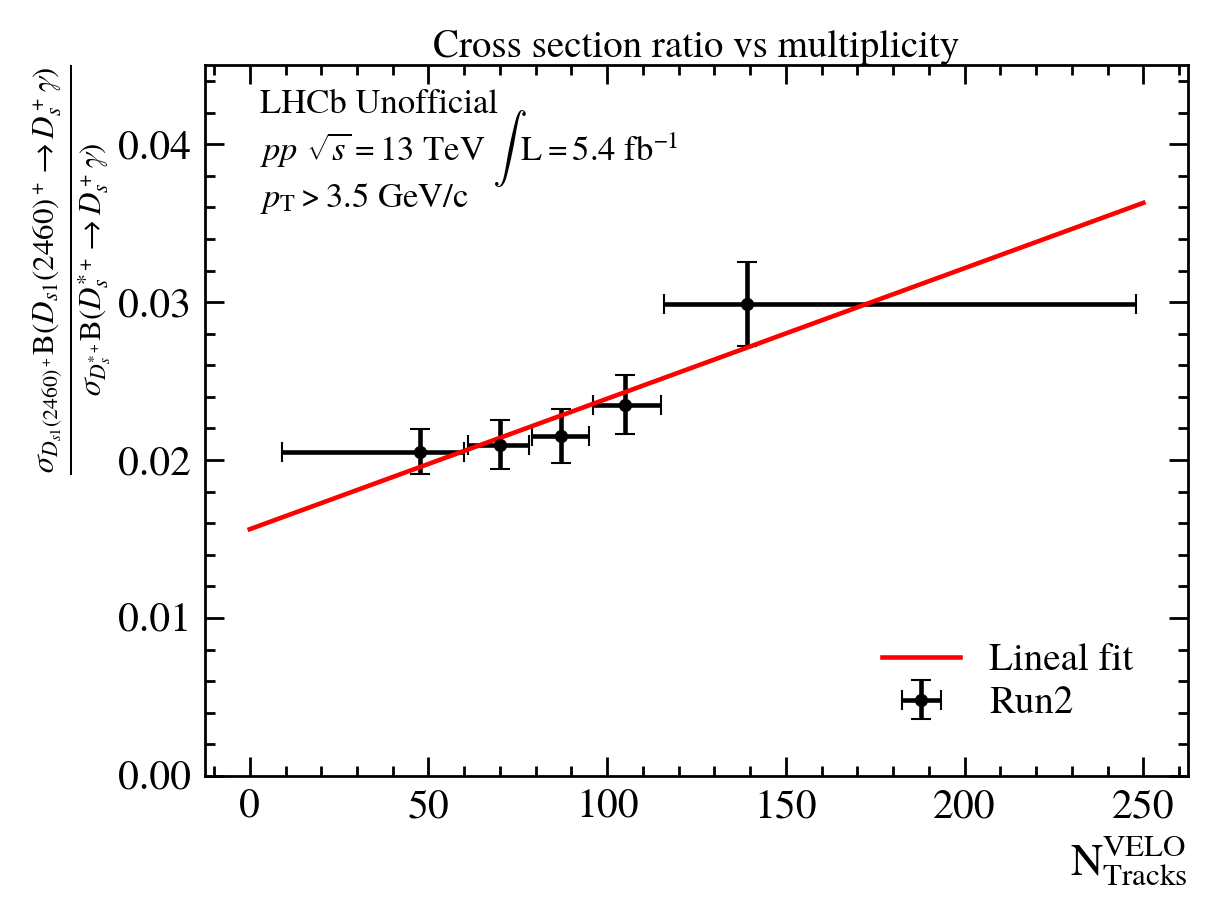

In [11]:
def recta(x, a, b):
    return a + b*x

linear_fit, cov_matrix = sci.optimize.curve_fit(recta, 
                                                df_Ds1_vals_def["nVelo_mean"], cr_sec_ratio_def, 
                                                sigma=ucr_sec_ratio_def)
ulinear_fit = np.sqrt(np.diag(cov_matrix))
xref = np.linspace(0, 250, 100)

plt.figure(1)
plt.text(3, 0.042, r"LHCb Unofficial", fontsize=25)
plt.text(3, 0.039, r"$pp$ $\sqrt{s}=13$ $\mathrm{TeV} \text{ } \int \text{ } \mathcal{L} = 5.4 \text{ } \mathrm{fb^{-1}}$", fontsize=25)
plt.text(3, 0.036, r"$p_{\mathrm{T}} > 3.5 \text{ } \mathrm{GeV/c}$", fontsize=25)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], cr_sec_ratio_def, ucr_sec_ratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.plot(xref, recta(xref, linear_fit[0], linear_fit[1]), "r-", label='Lineal fit')
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\frac{\sigma_{D_{s1}(2460)^+}\mathcal{B}(D_{s1}(2460)^+ \to D_s^+ \gamma)}{\sigma_{D_s^{*+}}\mathcal{B}(D_s^{*+} \to D_s^+ \gamma)}$")
plt.title("Cross section ratio vs multiplicity")
plt.ylim(0, 0.045)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_fit_default.pdf".format(ninters, L0_trig), dpi=300, bbox_inches='tight')


print("Intercept = {0} +/- {1}".format(linear_fit[0], ulinear_fit[0]))
print("Slope = {0} +/- {1}".format(linear_fit[1], ulinear_fit[1]))
print("Slope/Intercept = {0} %".format(linear_fit[1]*100/linear_fit[0]))
print("Number of sigmas = {0}".format((linear_fit[1]-0)/ulinear_fit[1]))
print()

## Crosschecks

### Data vs MC parameters 

In [12]:
MC_fits_path = "/home3/ivan.cambon/DsJ_states_production_research/Ds1DsGamma_analysis/MC_Analysis/Velo_fits/Results"

MC_Dsst_fit_vals_file = "Sim_DsgL_Dsst_sig_mass_fit_CB_vals_{0}Velo_{1}_{2}.csv".format(ninters, L0_trig, IP_cut)
MC_Dsst_fit_uncs_file = "Sim_DsgL_Dsst_sig_mass_fit_CB_uncs_{0}Velo_{1}_{2}.csv".format(ninters, L0_trig, IP_cut)

MC_Ds1_fit_vals_file = "Sim_DsgL_Ds1_sig_mass_fit_CB_vals_{0}Velo_{1}_{2}.csv".format(ninters, L0_trig, IP_cut)
MC_Ds1_fit_uncs_file = "Sim_DsgL_Ds1_sig_mass_fit_CB_uncs_{0}Velo_{1}_{2}.csv".format(ninters, L0_trig, IP_cut)

MC_Dsst_fit_vals = pd.read_csv("{0}/{1}".format(MC_fits_path, MC_Dsst_fit_vals_file))
MC_Dsst_fit_uncs = pd.read_csv("{0}/{1}".format(MC_fits_path, MC_Dsst_fit_uncs_file))

MC_Ds1_fit_vals = pd.read_csv("{0}/{1}".format(MC_fits_path, MC_Ds1_fit_vals_file))
MC_Ds1_fit_uncs = pd.read_csv("{0}/{1}".format(MC_fits_path, MC_Ds1_fit_uncs_file))

FileNotFoundError: [Errno 2] No such file or directory: '/home3/ivan.cambon/DsJ_states_production_research/Ds1DsGamma_analysis/MC_Analysis/Velo_fits/Results/Sim_DsgL_Dsst_sig_mass_fit_CB_vals_5Velo_TIS_orIP.csv'

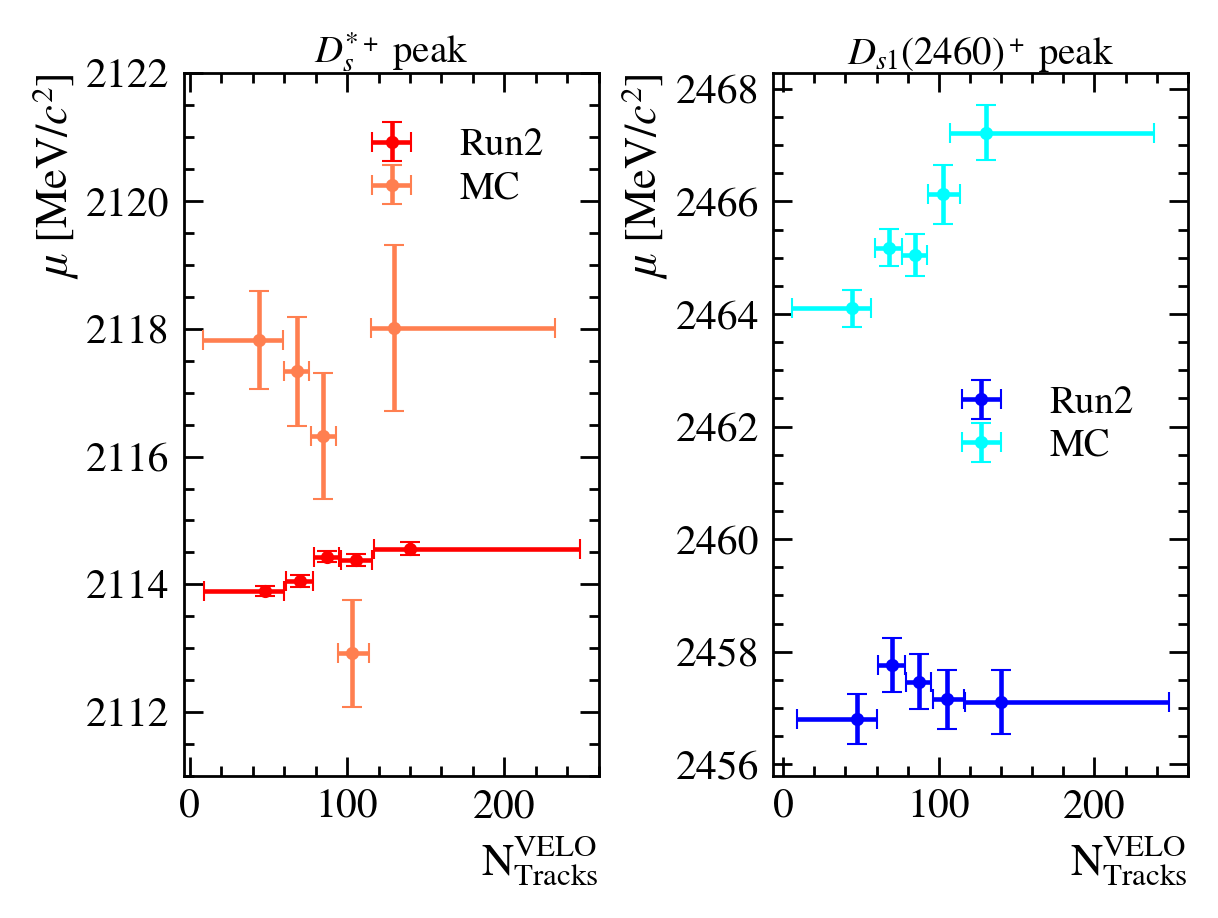

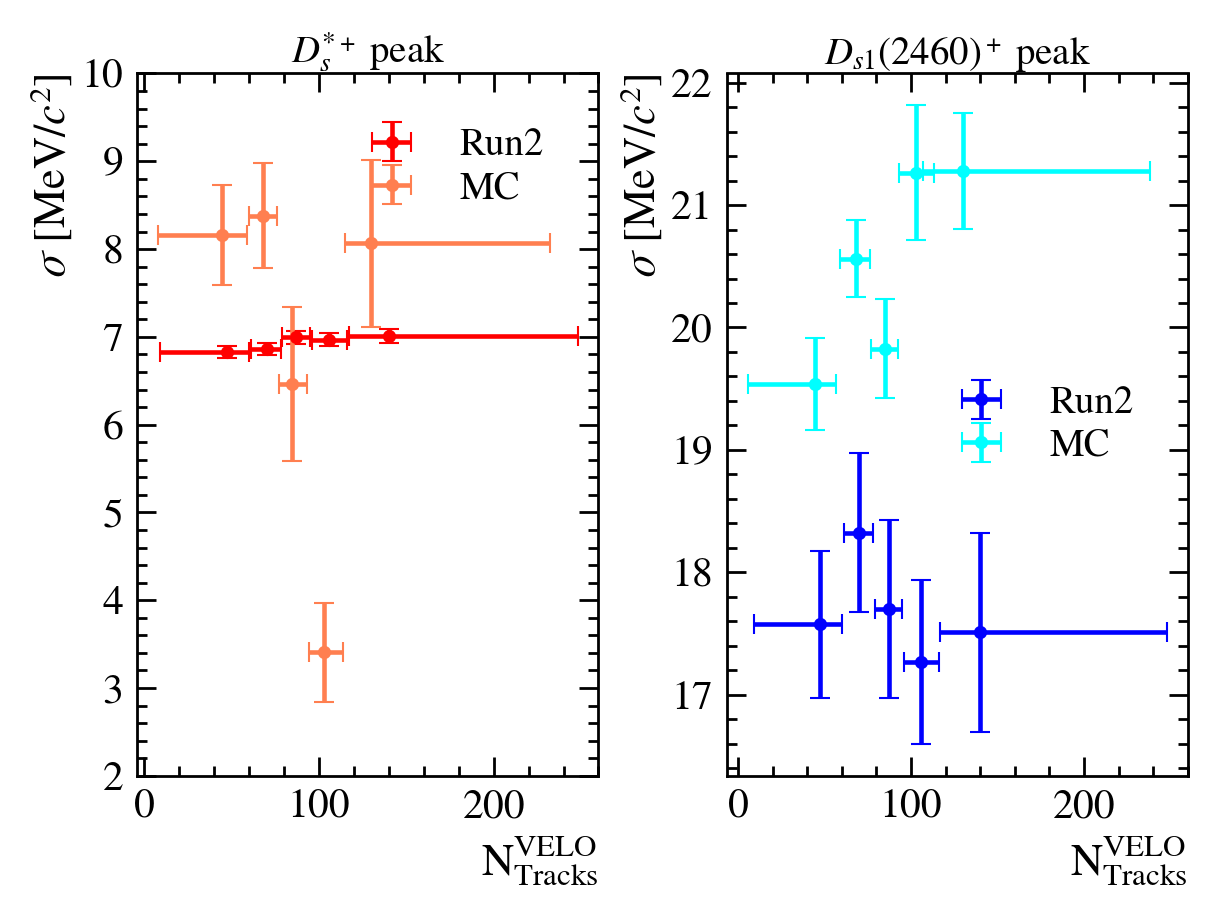

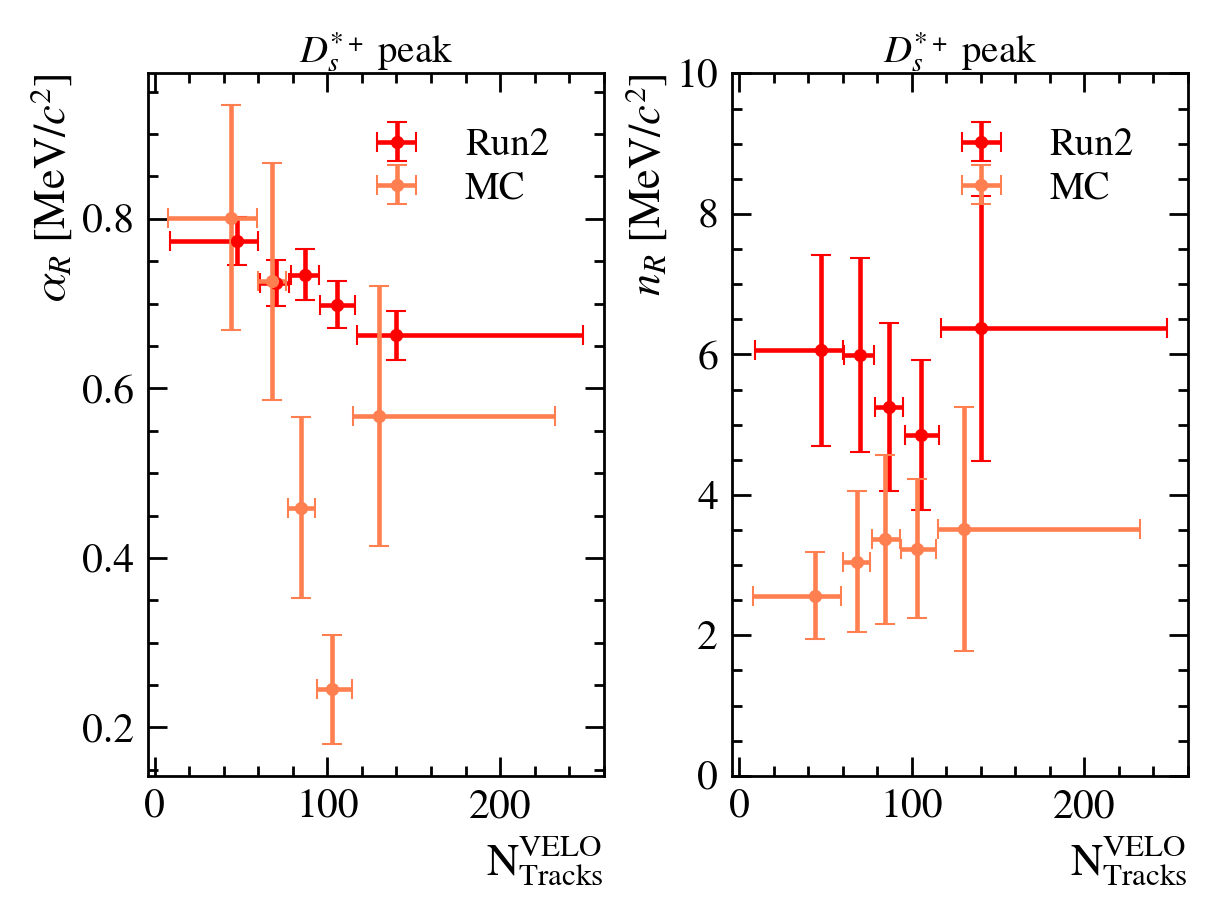

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["mu_Dsst"], df_Dsst_uncs_def["mu_Dsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2")
plt.errorbar(MC_Dsst_fit_vals["nVelo_mean"], MC_Dsst_fit_vals["mu_Dsst"], MC_Dsst_fit_uncs["mu_Dsst"], 
             xerr=[MC_Dsst_fit_vals["nVelo_udown"], MC_Dsst_fit_vals["nVelo_uup"]], 
             fmt='.', color="coral", ecolor="coral", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylim(2111, 2122)
plt.ylabel(r"$\mu$ [MeV/$c^2$]")
plt.legend()

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["mu_Ds1"], df_Ds1_uncs_def["mu_Ds1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label="Run2")
plt.errorbar(MC_Ds1_fit_vals["nVelo_mean"], MC_Ds1_fit_vals["mu_Ds1"], MC_Ds1_fit_uncs["mu_Ds1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="cyan", ecolor="cyan", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\mu$ [MeV/$c^2$]")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.savefig("Graphs/Comp_Run2_DsgL_mass_CB_centroid_default.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["sigma_Dsst"], df_Dsst_uncs_def["sigma_Dsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2")
plt.errorbar(MC_Dsst_fit_vals["nVelo_mean"], MC_Dsst_fit_vals["sigma_Dsst"], MC_Dsst_fit_uncs["sigma_Dsst"], 
             xerr=[MC_Dsst_fit_vals["nVelo_udown"], MC_Dsst_fit_vals["nVelo_uup"]], 
             fmt='.', color="coral", ecolor="coral", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$\sigma$ [MeV/$c^2$]")
plt.ylim(2, 10)
plt.legend()

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["sigma_Ds1"], df_Ds1_uncs_def["sigma_Ds1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label="Run2")
plt.errorbar(MC_Ds1_fit_vals["nVelo_mean"], MC_Ds1_fit_vals["sigma_Ds1"], MC_Ds1_fit_uncs["sigma_Ds1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="cyan", ecolor="cyan", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\sigma$ [MeV/$c^2$]")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.savefig("Graphs/Comp_Run2_DsgL_mass_CB_widths_default.pdf", dpi=300, bbox_inches='tight')

plt.figure(3)
plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], -df_Dsst_vals_def["alphaR_Dsst"], df_Dsst_uncs_def["alphaR_Dsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2")
plt.errorbar(MC_Dsst_fit_vals["nVelo_mean"], MC_Dsst_fit_vals["alphaR_Dsst"], MC_Dsst_fit_uncs["alphaR_Dsst"], 
             xerr=[MC_Dsst_fit_vals["nVelo_udown"], MC_Dsst_fit_vals["nVelo_uup"]], 
             fmt='.', color="coral", ecolor="coral", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$\alpha_R$ [MeV/$c^2$]")
plt.legend()
plt.subplot(122)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["nR_Dsst"], df_Dsst_uncs_def["nR_Dsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2")
plt.errorbar(MC_Dsst_fit_vals["nVelo_mean"], MC_Dsst_fit_vals["nR_Dsst"], MC_Dsst_fit_uncs["nR_Dsst"], 
             xerr=[MC_Dsst_fit_vals["nVelo_udown"], MC_Dsst_fit_vals["nVelo_uup"]], 
             fmt='.', color="coral", ecolor="coral", capsize=7, label="MC")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$n_R$ [MeV/$c^2$]")
plt.ylim(0, 10)
plt.legend()
plt.savefig("Graphs/Comp_Run2_DsgL_mass_Dsst_tails_default.pdf", dpi=300, bbox_inches='tight')

### Individual years behaviour

In [ ]:
Years = ["2018", "2017", "2016"]

Dsst_uncs_files = ["./Results/Exp_{0}_Dsg_mass_Dsst_{1}_ufit_free_uncs_str3_{2}Velo_{3}_{4}.csv".format(Year, Ds1_model, ninters, L0_trig, IP_cut) for Year in Years]
Dsst_vals_files = ["./Results/Exp_{0}_Dsg_mass_Dsst_{1}_ufit_free_vals_str3_{2}Velo_{3}_{4}.csv".format(Year, Ds1_model, ninters, L0_trig, IP_cut) for Year in Years]

Ds1_vals_files = ["./Results/Exp_{0}_Dsg_mass_Ds1_{1}_ufit_free_vals_str3_{2}Velo_{3}_{4}.csv".format(Year, Ds1_model, ninters, L0_trig, IP_cut) for Year in Years]
Ds1_uncs_files = ["./Results/Exp_{0}_Dsg_mass_Ds1_{1}_ufit_free_uncs_str3_{2}Velo_{3}_{4}.csv".format(Year, Ds1_model, ninters, L0_trig, IP_cut) for Year in Years]

dfs_Dsst_vals = [pd.read_csv(file) for file in Dsst_vals_files]
dfs_Dsst_uncs = [pd.read_csv(file) for file in Dsst_uncs_files]

dfs_Ds1_vals = [pd.read_csv(file) for file in Ds1_vals_files]
dfs_Ds1_uncs = [pd.read_csv(file) for file in Ds1_uncs_files]

FileNotFoundError: [Errno 2] No such file or directory: './Results/Exp_2018_Dsg_mass_Dsst_CB_ufit_free_vals_str3_5Velo_TIS_orIP.csv'

In [ ]:
yratios_ysep_def  = [df_Ds1["NDs1"]/df_Dsst["NDsst"] for df_Ds1, df_Dsst in zip(dfs_Ds1_vals, dfs_Dsst_vals)]

uyratios_ysep_def = [unc_ratio(dfv_Ds1["NDs1"], dfv_Dsst["NDsst"], dfu_Ds1["NDs1"], dfu_Dsst["NDsst"]) 
                     for dfv_Ds1, dfv_Dsst, dfu_Ds1, dfu_Dsst in zip(dfs_Ds1_vals, dfs_Dsst_vals, dfs_Ds1_uncs, dfs_Dsst_uncs)]

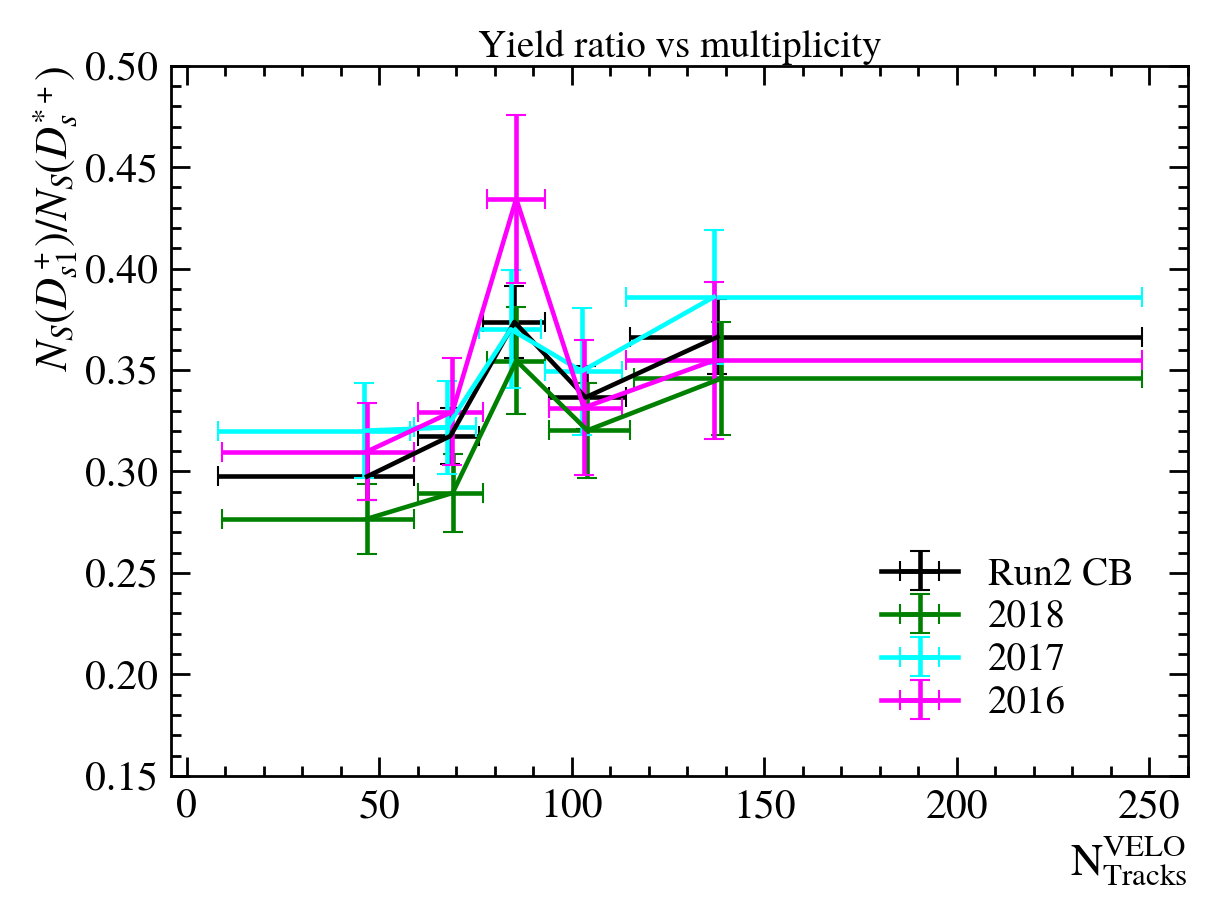

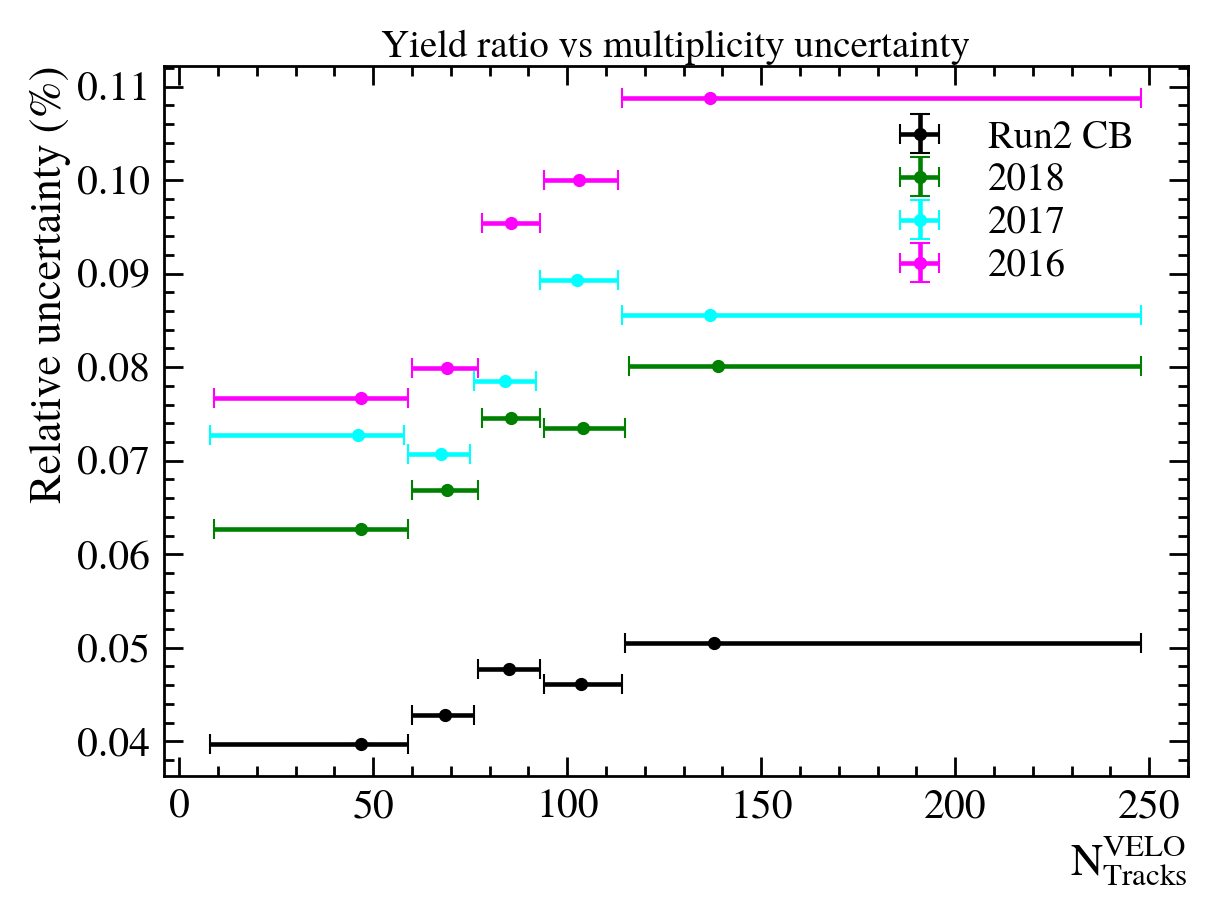

In [ ]:
colors = ["green", "cyan", "magenta"]

plt.figure(1)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], yratio_def, uyratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='-', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["nVelo_mean"], yratios_ysep_def[i], uyratios_ysep_def[i], 
                  xerr=[(dfs_Ds1_vals[i])["nVelo_udown"], (dfs_Ds1_vals[i])["nVelo_uup"]], 
                  fmt='-', color=colors[i], ecolor=colors[i], capsize=7, label=Years[i])

plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$")
plt.title("Yield ratio vs multiplicity")
plt.ylim(0.15, 0.5)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_ycomp.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], uyratio_def/yratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["nVelo_mean"], uyratios_ysep_def[i]/yratios_ysep_def[i], yerr=0,
                  xerr=[(dfs_Ds1_vals[i])["nVelo_udown"], (dfs_Ds1_vals[i])["nVelo_uup"]], 
                  fmt='.', color=colors[i], ecolor=colors[i], capsize=7, label=Years[i])

plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Yield ratio vs multiplicity uncertainty")
plt.legend()
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_ru_ycomp.pdf", dpi=300, bbox_inches='tight')

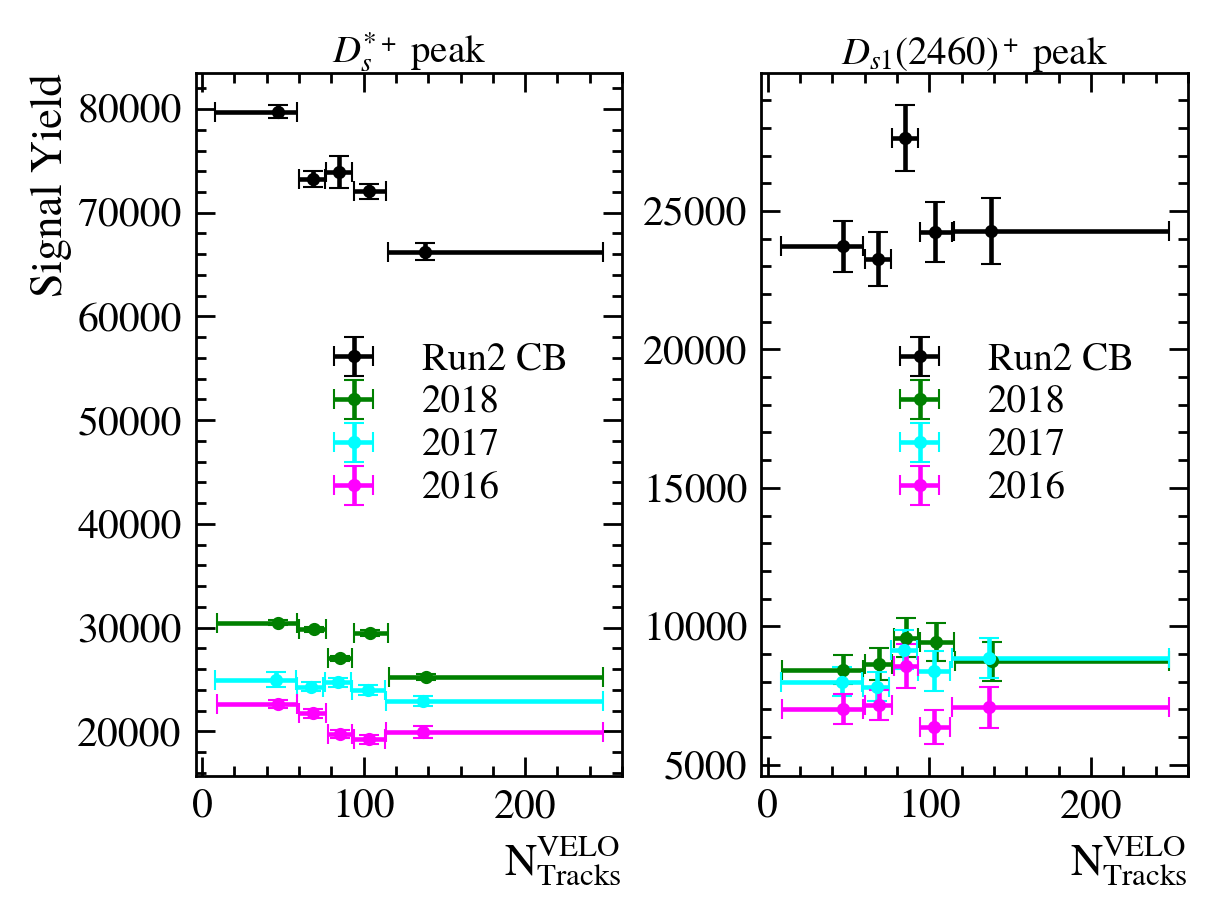

In [ ]:
plt.figure(1)    
plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["NDsst"], df_Dsst_uncs_def["NDsst"],
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["nVelo_mean"], (dfs_Dsst_vals[i])["NDsst"], (dfs_Dsst_uncs[i])["NDsst"], 
                 xerr=[(dfs_Dsst_vals[i])["nVelo_udown"], (dfs_Dsst_vals[i])["nVelo_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=7, label=Years[i])
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield")
plt.legend()

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["NDs1"], df_Ds1_uncs_def["NDs1"],
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["nVelo_mean"], (dfs_Ds1_vals[i])["NDs1"], (dfs_Ds1_uncs[i])["NDs1"], 
                 xerr=[(dfs_Ds1_vals[i])["nVelo_udown"], (dfs_Ds1_vals[i])["nVelo_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=7, label=Years[i])
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.savefig("Graphs/Exp_Run2_DsgL_mass_yields_ycomp.pdf", dpi=300, bbox_inches='tight')

### $D_{s1}^+$ signal model

In [ ]:
IP_cut = "orIP"
Ds1_model = "G"
L0_trig = "TIS"

Dsst_vals_file_G = "Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Dsst_uncs_file_G = "Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

Ds1_vals_file_G = "Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Ds1_uncs_file_G = "Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

In [ ]:
df_Dsst_vals_G = pd.read_csv(Dsst_vals_file_G) 
df_Dsst_uncs_G = pd.read_csv(Dsst_uncs_file_G) 

df_Ds1_vals_G = pd.read_csv(Ds1_vals_file_G)
df_Ds1_uncs_G = pd.read_csv(Ds1_uncs_file_G)

In [ ]:
yratio_G  = df_Ds1_vals_G["NDs1"] / df_Dsst_vals_G["NDsst"] 

uyratio_G = unc_ratio(df_Ds1_vals_G["NDs1"], df_Dsst_vals_G["NDsst"], 
                      df_Ds1_uncs_G["NDs1"], df_Dsst_uncs_G["NDsst"]) 

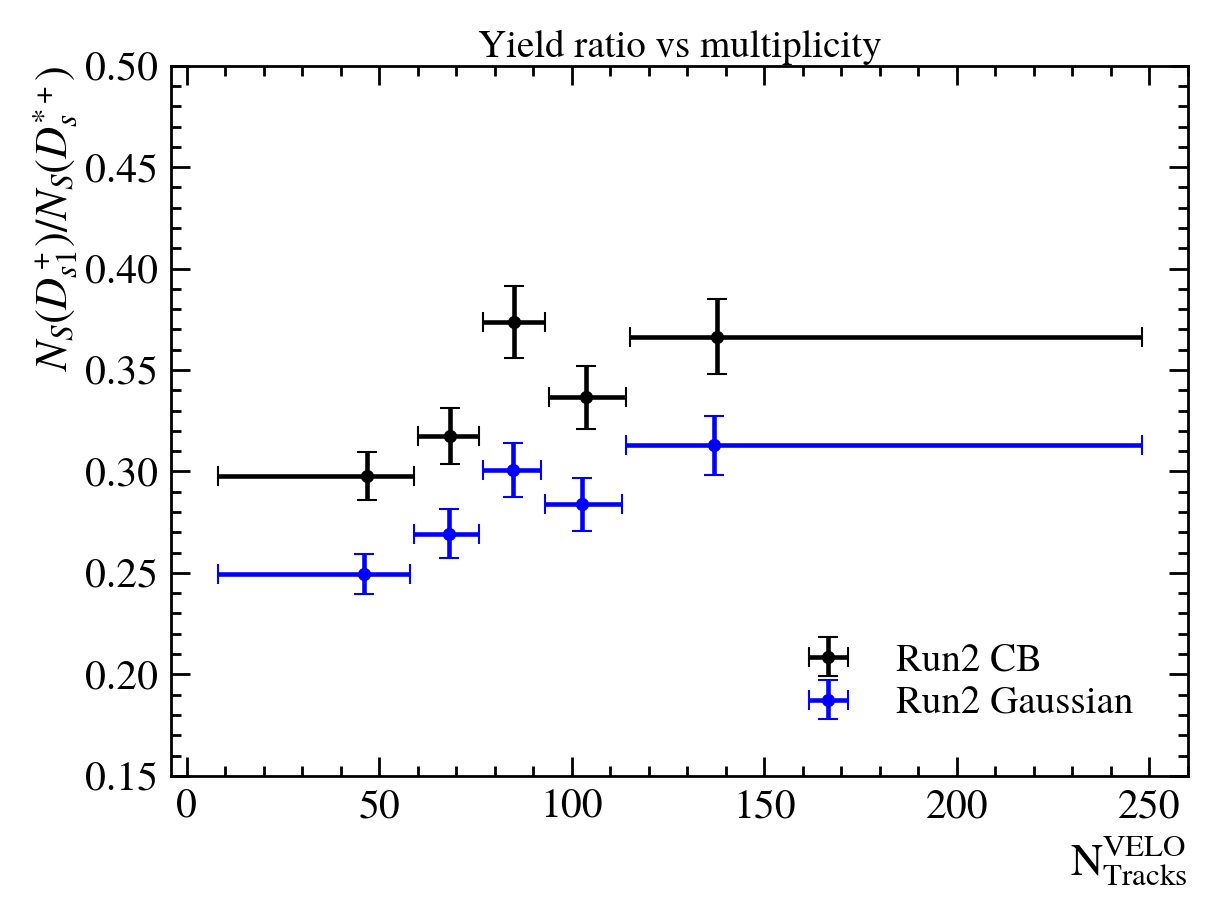

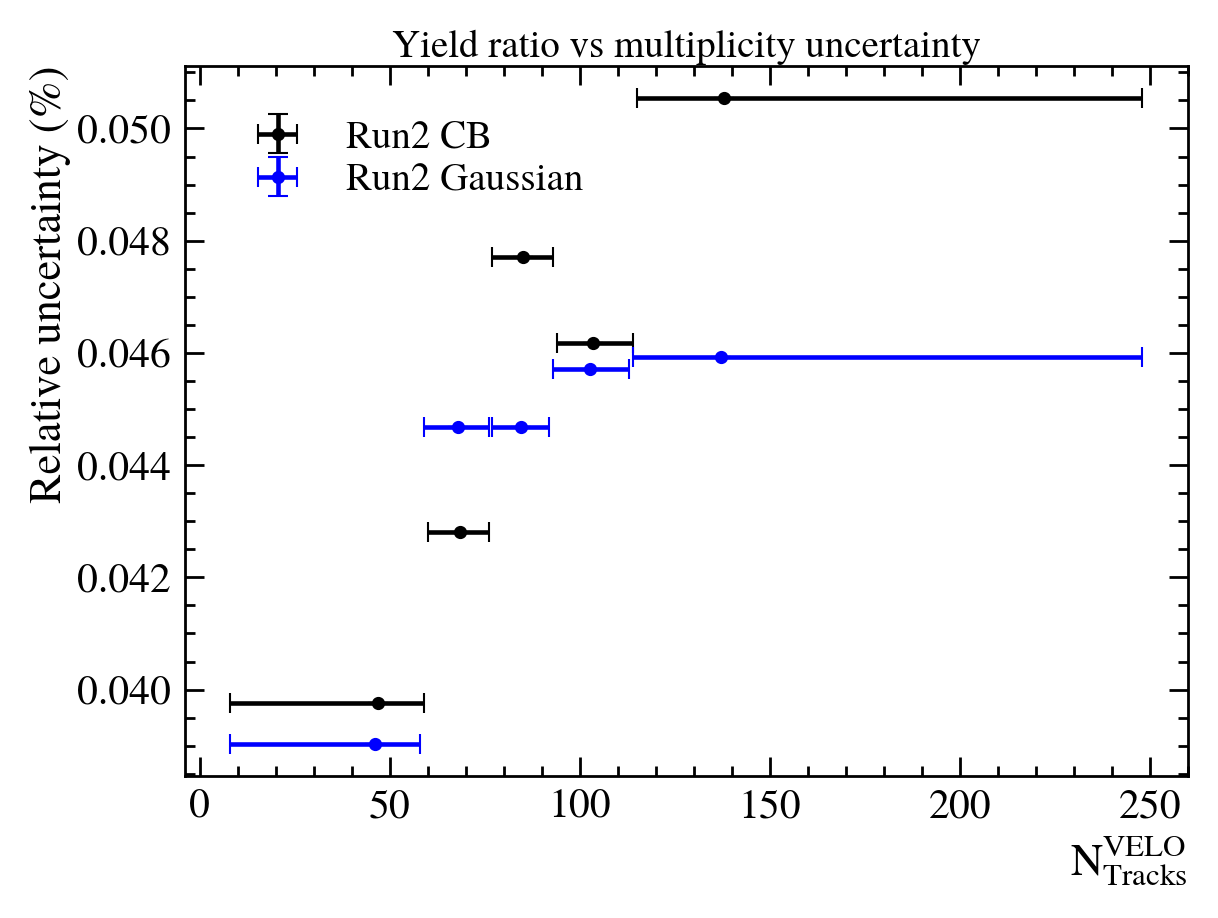

In [ ]:
plt.figure(1)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], yratio_def, uyratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
plt.errorbar(df_Ds1_vals_G["nVelo_mean"], yratio_G, uyratio_G, 
             xerr=[df_Ds1_vals_G["nVelo_udown"], df_Ds1_vals_G["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label=r"Run2 Gaussian")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$")
plt.title("Yield ratio vs multiplicity")
plt.ylim(0.15, 0.5)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_Gcomp.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], uyratio_def/yratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 CB")
plt.errorbar(df_Ds1_vals_G["nVelo_mean"], uyratio_G/yratio_G, yerr=0,
             xerr=[df_Ds1_vals_G["nVelo_udown"], df_Ds1_vals_G["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label=r"Run2 Gaussian")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Yield ratio vs multiplicity uncertainty")
plt.legend()
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_ru_Gcomp.pdf", dpi=300, bbox_inches='tight')


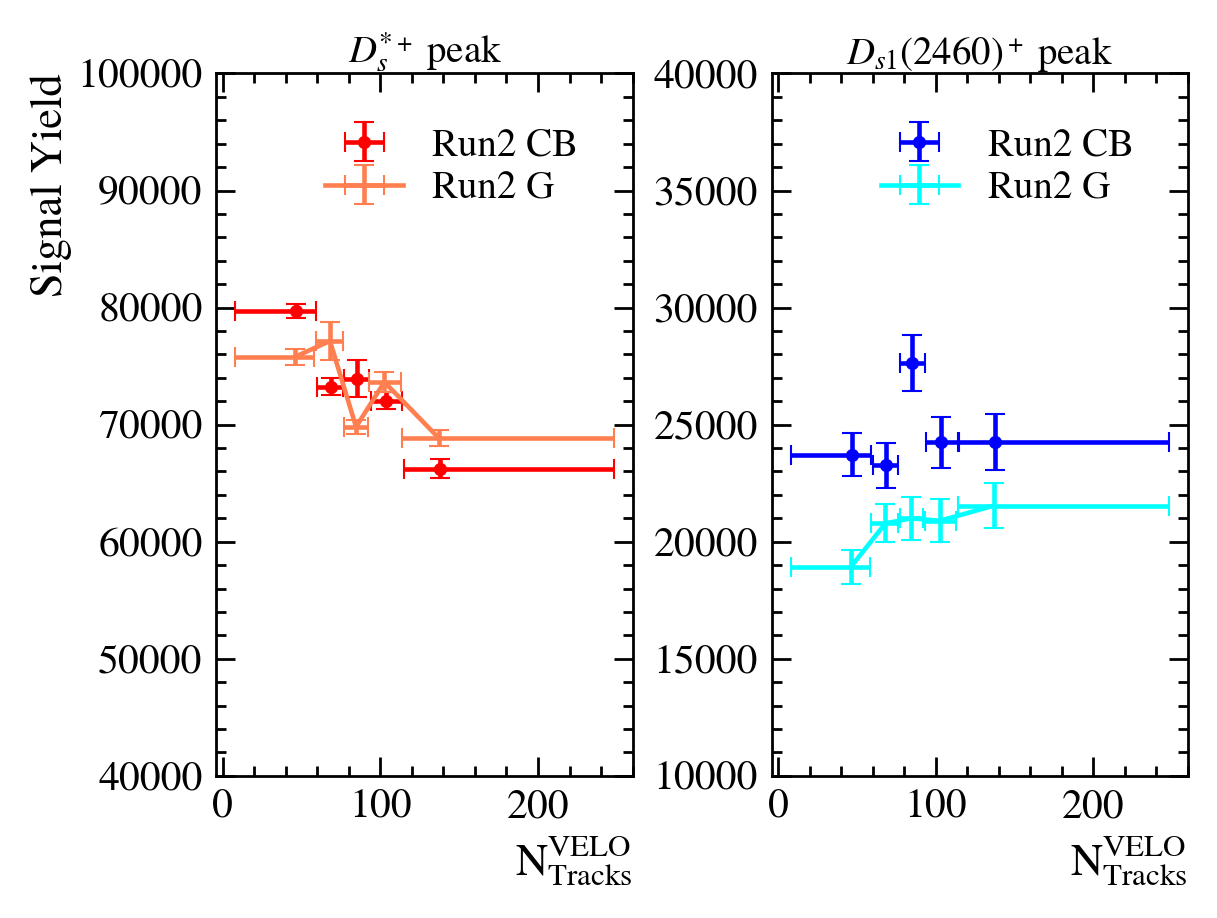

In [ ]:
plt.figure(1)

plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["NDsst"], df_Dsst_uncs_def["NDsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2 CB")
plt.errorbar(df_Dsst_vals_G["nVelo_mean"], df_Dsst_vals_G["NDsst"], df_Dsst_uncs_G["NDsst"], 
             xerr=[df_Dsst_vals_G["nVelo_udown"], df_Dsst_vals_G["nVelo_uup"]], 
             fmt='-', color="coral", ecolor="coral", capsize=7, label="Run2 G")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield")
plt.legend()
plt.ylim(40000, 100000)

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["NDs1"], df_Ds1_uncs_def["NDs1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label="Run2 CB")
plt.errorbar(df_Ds1_vals_G["nVelo_mean"], df_Ds1_vals_G["NDs1"], df_Ds1_uncs_G["NDs1"], 
             xerr=[df_Ds1_vals_G["nVelo_udown"], df_Ds1_vals_G["nVelo_uup"]], 
             fmt='-', color="cyan", ecolor="cyan", capsize=7, label="Run2 G")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.ylim(10000, 40000)
plt.savefig("Graphs/Exp_Run2_DsgL_mass_yields_Gcomp.pdf", dpi=300, bbox_inches='tight')

###  $\log_{10}\chi^2_{\mathrm{IP}}$ tight cut

In [ ]:
IP_cut = "tightIP"
Ds1_model = "CB"
L0_trig = "TIS"

Dsst_vals_file_tIP = "Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Dsst_uncs_file_tIP = "Results/Exp_Run2_Dsg_mass_Dsst_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

Ds1_vals_file_tIP = "Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_vals_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)
Ds1_uncs_file_tIP = "Results/Exp_Run2_Dsg_mass_Ds1_{0}_ufit_free_uncs_str3_{1}Velo_{2}_{3}.csv".format(Ds1_model, ninters, L0_trig, IP_cut)

In [ ]:
df_Dsst_vals_tIP = pd.read_csv(Dsst_vals_file_tIP) 
df_Dsst_uncs_tIP = pd.read_csv(Dsst_uncs_file_tIP) 

df_Ds1_vals_tIP = pd.read_csv(Ds1_vals_file_tIP)
df_Ds1_uncs_tIP = pd.read_csv(Ds1_uncs_file_tIP)

In [ ]:
yratio_tIP  = df_Ds1_vals_tIP["NDs1"] / df_Dsst_vals_tIP["NDsst"] 

uyratio_tIP = unc_ratio(df_Ds1_vals_tIP["NDs1"], df_Dsst_vals_tIP["NDsst"], 
                        df_Ds1_uncs_tIP["NDs1"], df_Dsst_uncs_tIP["NDsst"]) 

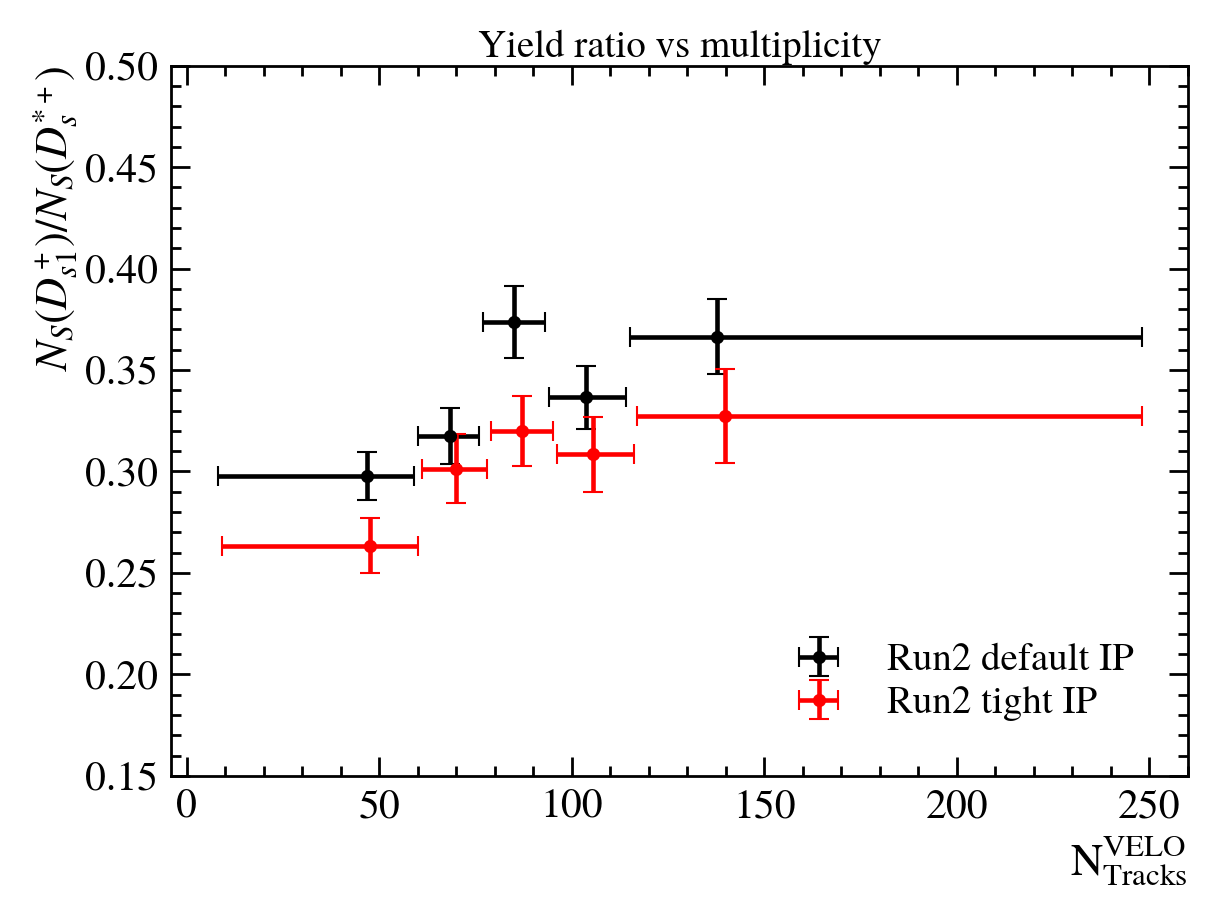

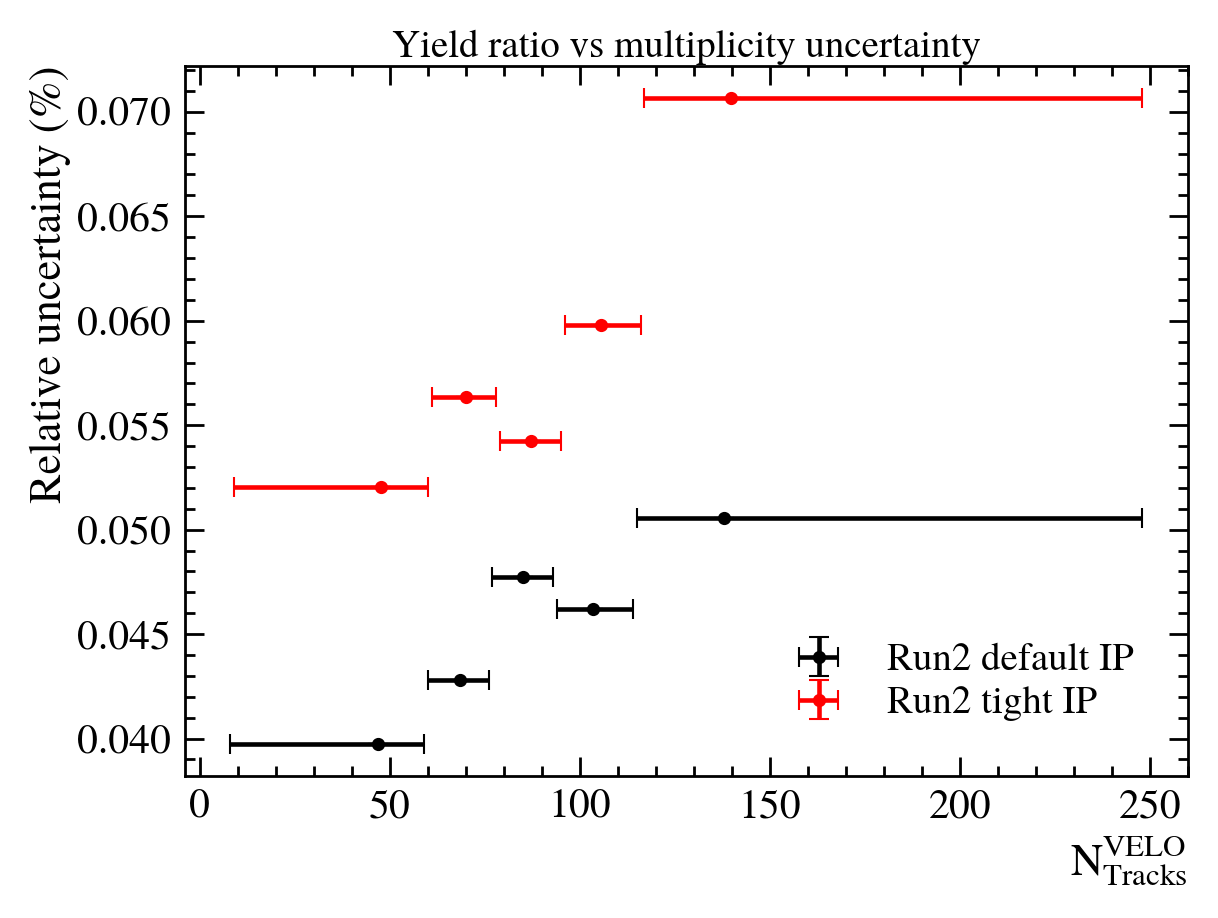

In [ ]:
plt.figure(1)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], yratio_def, uyratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], yratio_tIP, uyratio_tIP, 
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label=r"Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$")
plt.title("Yield ratio vs multiplicity")
plt.ylim(0.15, 0.5)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_IPcomp.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], uyratio_def/yratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], uyratio_tIP/yratio_tIP, yerr=0,
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Yield ratio vs multiplicity uncertainty")
plt.legend()
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_yield_ratio_ru_IPcomp.pdf", dpi=300, bbox_inches='tight')


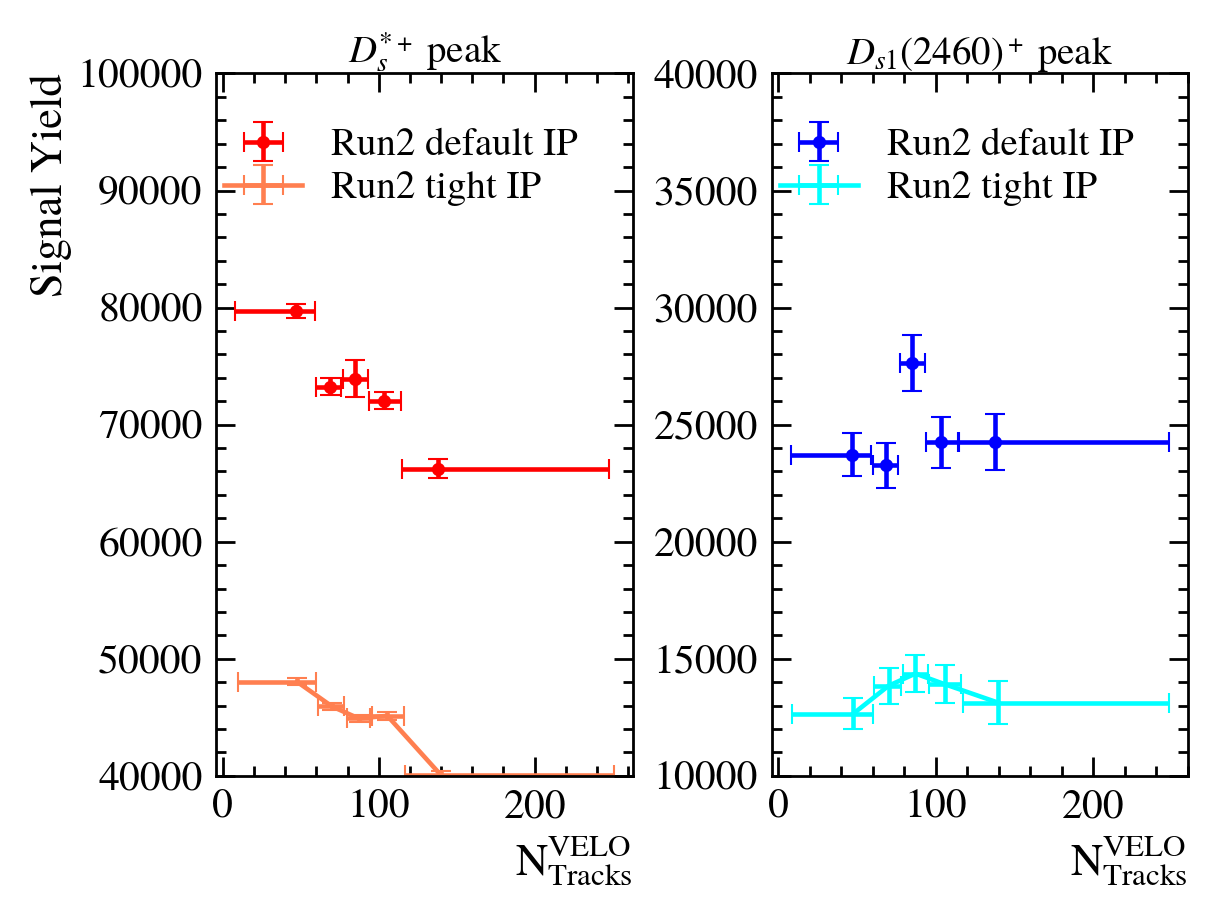

In [ ]:
plt.figure(1)

plt.subplot(121)
plt.errorbar(df_Dsst_vals_def["nVelo_mean"], df_Dsst_vals_def["NDsst"], df_Dsst_uncs_def["NDsst"], 
             xerr=[df_Dsst_vals_def["nVelo_udown"], df_Dsst_vals_def["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2 default IP")
plt.errorbar(df_Dsst_vals_tIP["nVelo_mean"], df_Dsst_vals_tIP["NDsst"], df_Dsst_uncs_tIP["NDsst"], 
             xerr=[df_Dsst_vals_G["nVelo_udown"], df_Dsst_vals_G["nVelo_uup"]], 
             fmt='-', color="coral", ecolor="coral", capsize=7, label="Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield")
plt.legend()
plt.ylim(40000, 100000)

plt.subplot(122)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], df_Ds1_vals_def["NDs1"], df_Ds1_uncs_def["NDs1"], 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="blue", ecolor="blue", capsize=7, label="Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], df_Ds1_vals_tIP["NDs1"], df_Ds1_uncs_tIP["NDs1"], 
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='-', color="cyan", ecolor="cyan", capsize=7,label="Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.ylim(10000, 40000)
plt.savefig("Graphs/Exp_Run2_DsgL_mass_yields_IPcomp.pdf", dpi=300, bbox_inches='tight')

In [ ]:
effs_file = "MC_DsgL_eff_tot_ratio_vals_{0}_{1}_{2}.txt".format(Ds1_model, L0_trig, IP_cut)
ueffs_file = "MC_DsgL_eff_tot_ratio_uncs_{0}_{1}_{2}.txt".format(Ds1_model, L0_trig, IP_cut)

ratio_eff_tot_tIP = np.loadtxt("{0}/{1}".format(effs_path, effs_file))
uratio_eff_tot_tIP = np.loadtxt("{0}/{1}".format(effs_path, ueffs_file))

cr_sec_ratio_tIP = yratio_tIP * ratio_eff_tot_tIP
ucr_sec_ratio_tIP = cr_sec_ratio_tIP * np.sqrt((uyratio_tIP/yratio_tIP)**2 + (uratio_eff_tot_tIP/ratio_eff_tot_tIP)**2)

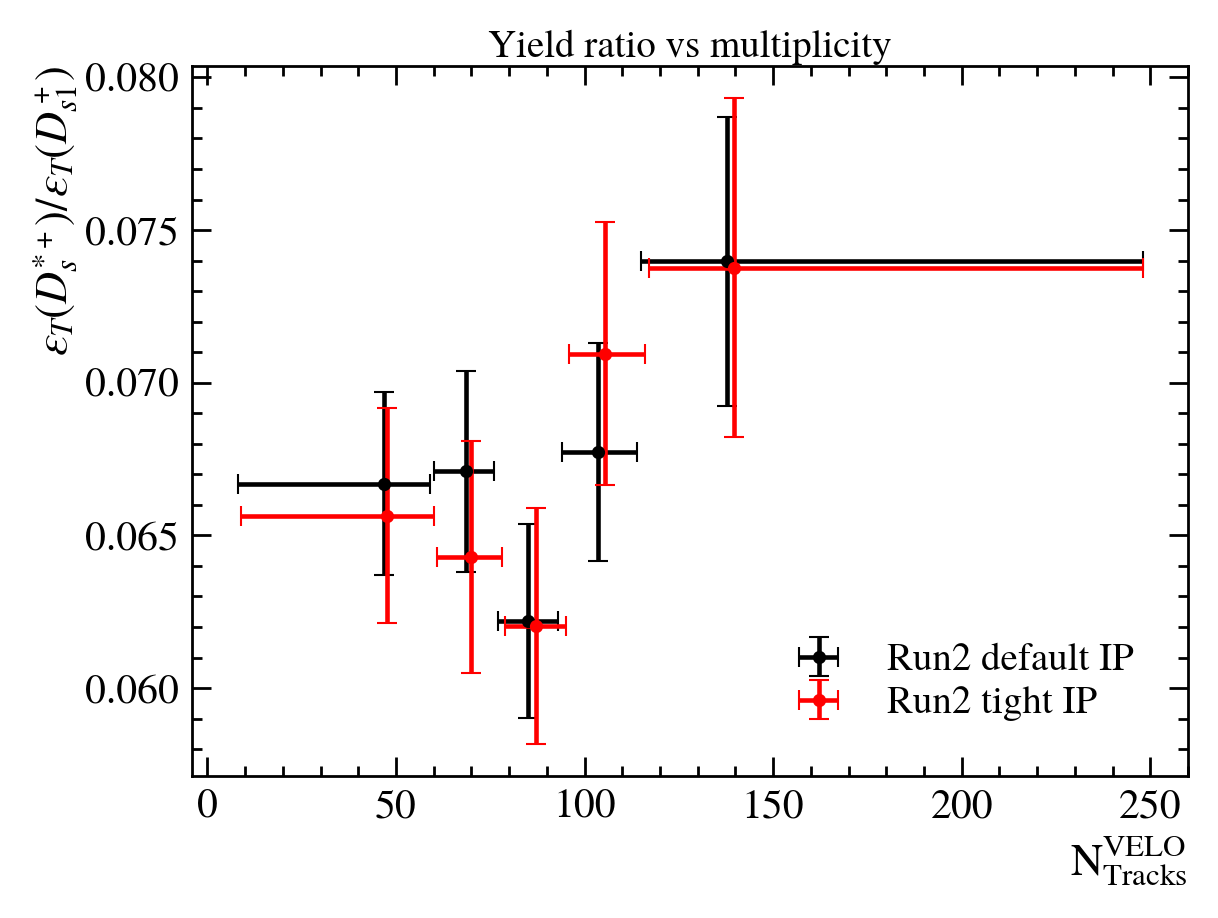

In [ ]:
plt.figure(1)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], ratio_eff_tot_def, uratio_eff_tot_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label=r"Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], ratio_eff_tot_tIP, uratio_eff_tot_tIP, 
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label=r"Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\varepsilon_{T}(D_s^{*+})/\varepsilon_{T}(D_{s1}^+)$")
plt.title("Yield ratio vs multiplicity")
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_eff_ratio_IPcomp.pdf", dpi=300, bbox_inches='tight')

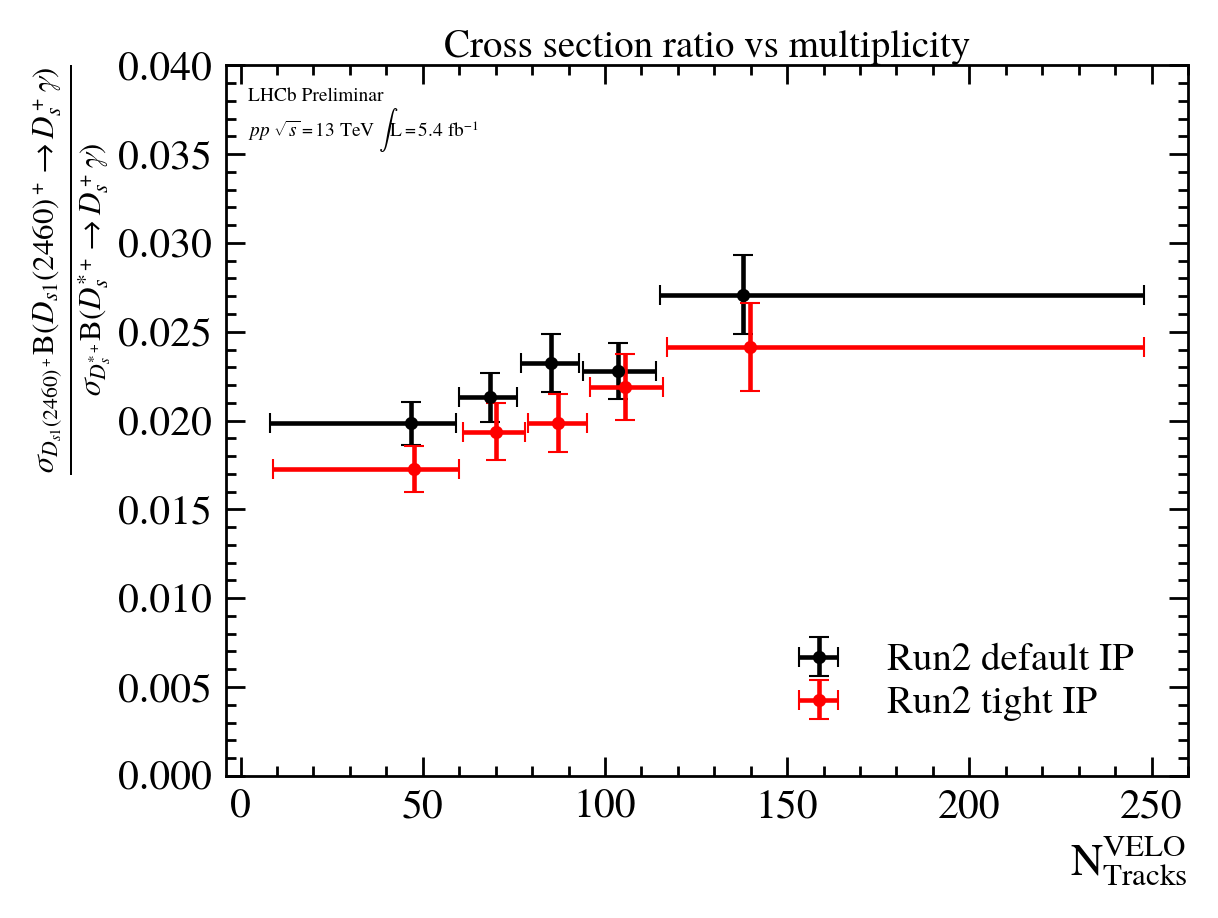

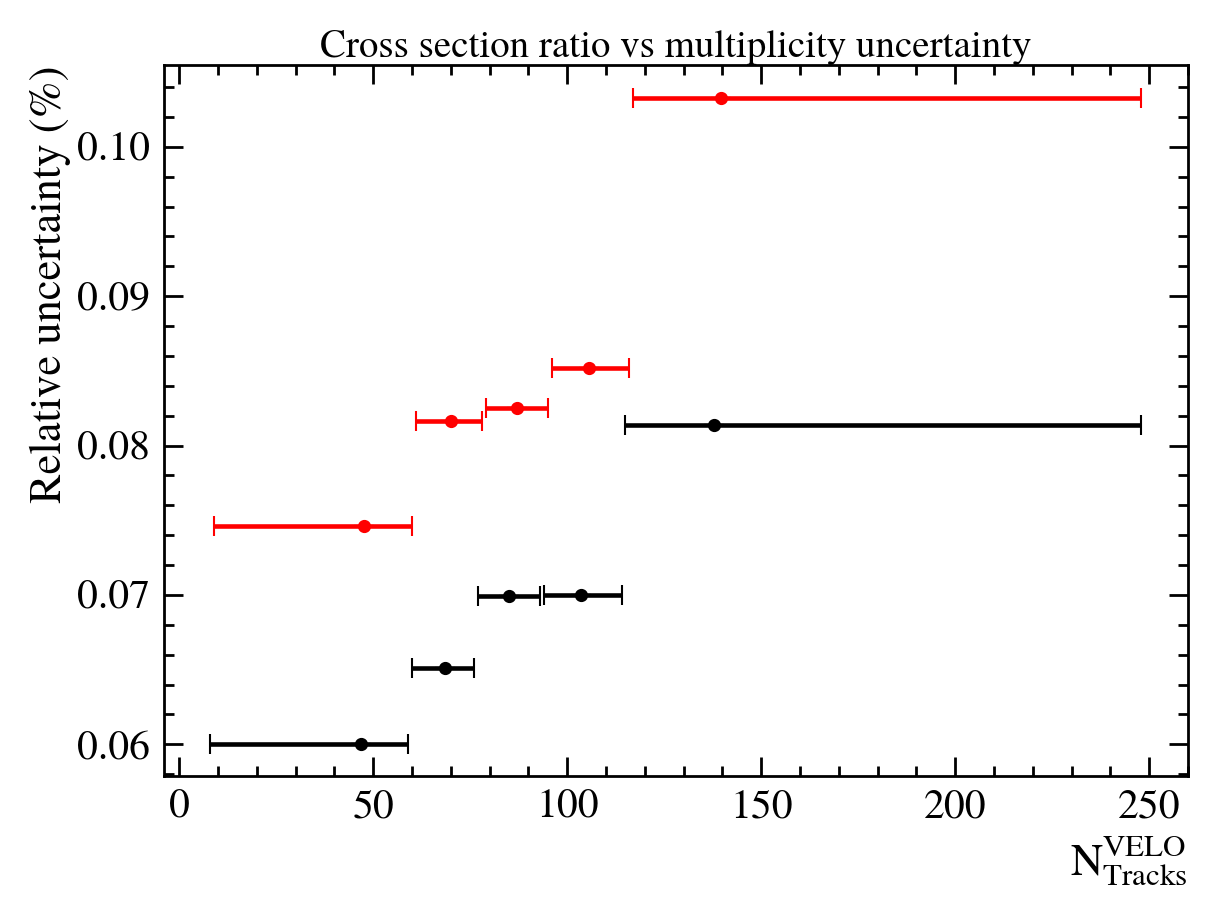

In [ ]:
colors = ["black", "red", "blue"]

        
plt.figure(1)
plt.text(2, 0.038, r"LHCb Preliminar")
plt.text(2, 0.036, r"$pp$ $\sqrt{s}=13$ $\mathrm{TeV} \text{ } \int \mathcal{L} = 5.4 \text{ } \mathrm{fb^{-1}}$")
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], cr_sec_ratio_def, ucr_sec_ratio_def, 
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], cr_sec_ratio_tIP, ucr_sec_ratio_tIP, 
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\frac{\sigma_{D_{s1}(2460)^+}\mathcal{B}(D_{s1}(2460)^+ \to D_s^+ \gamma)}{\sigma_{D_s^{*+}}\mathcal{B}(D_s^{*+} \to D_s^+ \gamma)}$")
plt.title("Cross section ratio vs multiplicity")
plt.ylim(0, 0.04)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_IPcomp.pdf", dpi=300, bbox_inches='tight')

plt.figure(2)
plt.errorbar(df_Ds1_vals_def["nVelo_mean"], ucr_sec_ratio_def/cr_sec_ratio_def, yerr=0,
             xerr=[df_Ds1_vals_def["nVelo_udown"], df_Ds1_vals_def["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2 default IP")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], ucr_sec_ratio_tIP/cr_sec_ratio_tIP, yerr=0,
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="red", ecolor="red", capsize=7, label="Run2 tight IP")
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"Relative uncertainty (%)")
plt.title("Cross section ratio vs multiplicity uncertainty")
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_ru_IPcomp.pdf", dpi=300, bbox_inches='tight')

Intercept = 0.013826251976040597 +/- 0.00047461872630286697
Slope = 7.418607575695342e-05 +/- 5.730041648962574e-06
Slope/Intercept = 0.5365595526937443 %
Number of sigmas = 12.946865014564917



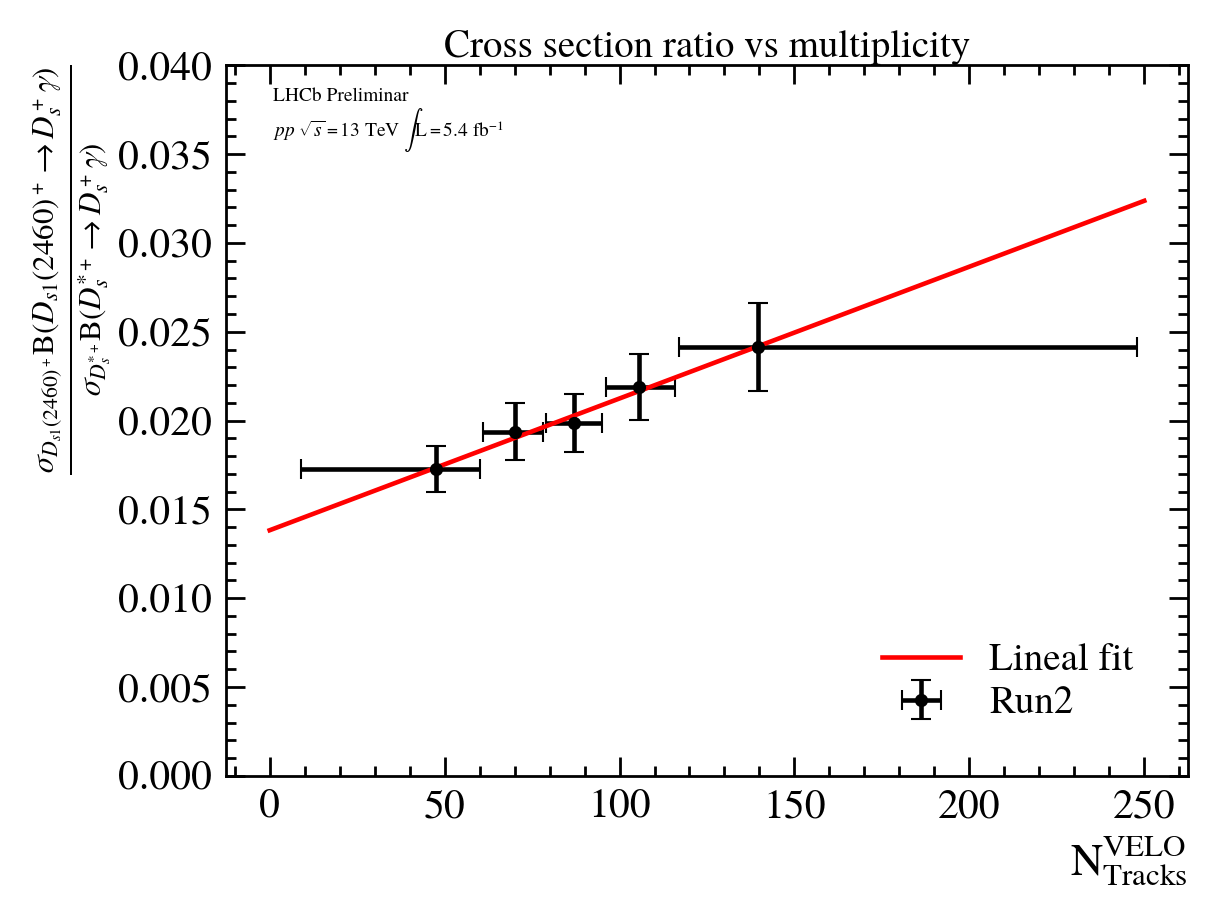

In [ ]:
def recta(x, a, b):
    return a + b*x

linear_fit, cov_matrix = sci.optimize.curve_fit(recta, 
                                                df_Ds1_vals_tIP["nVelo_mean"], cr_sec_ratio_tIP, 
                                                sigma=ucr_sec_ratio_tIP)
ulinear_fit = np.sqrt(np.diag(cov_matrix))
xref = np.linspace(0, 250, 100)

plt.figure(1)
plt.text(0.94, 0.038, r"LHCb Preliminar")
plt.text(0.94, 0.036, r"$pp$ $\sqrt{s}=13$ $\mathrm{TeV} \text{ } \int \mathcal{L} = 5.4 \text{ } \mathrm{fb^{-1}}$")
plt.errorbar(df_Ds1_vals_tIP["nVelo_mean"], cr_sec_ratio_tIP, ucr_sec_ratio_tIP, 
             xerr=[df_Ds1_vals_tIP["nVelo_udown"], df_Ds1_vals_tIP["nVelo_uup"]], 
             fmt='.', color="black", ecolor="black", capsize=7, label="Run2")
plt.plot(xref, recta(xref, linear_fit[0], linear_fit[1]), "r-", label='Lineal fit')
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
plt.ylabel(r"$\frac{\sigma_{D_{s1}(2460)^+}\mathcal{B}(D_{s1}(2460)^+ \to D_s^+ \gamma)}{\sigma_{D_s^{*+}}\mathcal{B}(D_s^{*+} \to D_s^+ \gamma)}$")
plt.title("Cross section ratio vs multiplicity")
plt.ylim(0, 0.04)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_Run2_DsgL_mass_Ds1_Dsst_cross_section_ratio_fit_tIP.pdf".format(ninters, L0_trig), dpi=300, bbox_inches='tight')


print("Intercept = {0} +/- {1}".format(linear_fit[0], ulinear_fit[0]))
print("Slope = {0} +/- {1}".format(linear_fit[1], ulinear_fit[1]))
print("Slope/Intercept = {0} %".format(linear_fit[1]*100/linear_fit[0]))
print("Number of sigmas = {0}".format((linear_fit[1]-0)/ulinear_fit[1]))
print()